<a href="https://colab.research.google.com/github/vcngeno/Mortgage_Probability_Default_Part_One/blob/main/Mortgage_Probability_Default_Vanessa_Ngeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Pre-processing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
!pip install category_encoders
from category_encoders import TargetEncoder

In [ ]:
df = pd.read_csv('/content/XYZloan_default_selected_vars.csv')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [ ]:
# Print columns to debug
print("Columns in df:", df.columns)

Columns in df: Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')


# Feature Engineering

In [ ]:
print("Columns in df:", df.columns)
print("Data types:\n", df.dtypes)

Columns in df: Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')
Data types:
 Unnamed: 0.1      int64
Unnamed: 0        int64


## Drop irrelevant columns

In [ ]:
df = df.drop(['Unnamed: 0.1'], axis=1, errors='ignore')

## Clean AP006 (OS_TYPE)

In [ ]:
if 'AP006' in df.columns:
    valid_platforms = ['ios', 'android', 'h5', 'api']
    df['AP006_clean'] = df['AP006'].apply(lambda x: x if x in valid_platforms else 'other')
else:
    df['AP006_clean'] = 'missing'
    print("Warning: AP006 not found, setting AP006_clean to 'missing'")


## Bin MB005 (YR_PHONE_ACTIVE) as a substitute for MB006


In [ ]:
if 'MB005' in df.columns:
    df['MB005_cat'] = pd.cut(df['MB005'], bins=[-float('inf'), 0, 2, 5, float('inf')],
                             labels=['new', 'recent', 'established', 'old'], right=False)
else:
    df['MB005_cat'] = 'missing'
    print("Warning: MB005 not found, setting MB005_cat to 'missing'")

## Bin continuous features

In [ ]:
def categorize_cr009(x):
    # Handle scalar input directly
    if x == -999:  # Handle missing values
        return 'missing'
    if x == -98:
        return 'no_credit_history'
    elif x == 0:
        return 'no_loans'
    elif x <= 10000:
        return 'low'
    elif x <= 50000:
        return 'medium'
    else:
        return 'high'

def categorize_pa022(x):
    # Handle scalar input directly
    if x == -999:  # Handle missing values
        return 'missing'
    if x == -99:
        return 'not_applicable'
    elif x == 0:
        return 'no_calls'
    elif x <= 7:
        return 'recent'
    elif x <= 30:
        return 'short_term'
    else:
        return 'long_term'

## Apply binning only if columns exist

In [ ]:
if 'AP001' in df.columns:
    df['AP001_cat'] = pd.cut(df['AP001'], bins=[0, 25, 35, 50, float('inf')],
                             labels=['young', 'young_adult', 'middle_aged', 'senior'], right=False)
else:
    df['AP001_cat'] = 'missing'
    print("Warning: AP001 not found")

if 'CR009' in df.columns:
    df['CR009_cat'] = df['CR009'].apply(categorize_cr009)
else:
    df['CR009_cat'] = 'missing'
    print("Warning: CR009 not found")

if 'PA022' in df.columns:
    df['PA022_cat'] = df['PA022'].apply(categorize_pa022)
else:
    df['PA022_cat'] = 'missing'
    print("Warning: PA022 not found")

## Create a feature for total credit queries (TD columns)

In [ ]:
td_cols = [col for col in df.columns if col.startswith('TD')]
if td_cols:
    df['total_queries'] = df[td_cols].sum(axis=1)
    df['total_queries_cat'] = pd.cut(df['total_queries'], bins=[-1, 0, 5, 20, float('inf')],
                                     labels=['none', 'low', 'medium', 'high'])
else:
    df['total_queries_cat'] = 'missing'
    print("Warning: No TD columns found")

## Define features and target

In [ ]:
if 'loan_default' not in df.columns:
    raise ValueError("loan_default column not found in DataFrame")
X = df.drop('loan_default', axis=1)
y = df['loan_default']

In [ ]:
# Verify columns and shapes
print("Columns in X:", X.columns)
print("X_train shape before split:", X.shape)

Columns in X: Index(['Unnamed: 0', 'id', 'AP001', 'AP002', 'AP003', 'AP004', 'AP005',
       'AP006', 'AP007', 'AP008', 'AP009', 'TD001', 'TD002', 'TD005', 'TD006',
       'TD009', 'TD010', 'TD013', 'TD014', 'TD015', 'TD022', 'TD023', 'TD024',
       'TD025', 'TD026', 'TD027', 'TD028', 'TD029', 'TD044', 'TD048', 'TD051',
       'TD054', 'TD055', 'TD061', 'TD062', 'CR004', 'CR005', 'CR009', 'CR012',
       'CR015', 'CR017', 'CR018', 'CR019', 'PA022', 'PA023', 'PA028', 'PA029',
       'PA030', 'PA031', 'CD008', 'CD018', 'CD071', 'CD072', 'CD088', 'CD100',
       'CD101', 'CD106', 'CD107', 'CD108', 'CD113', 'CD114', 'CD115', 'CD117',
       'CD118', 'CD120', 'CD121', 'CD123', 'CD130', 'CD131', 'CD132', 'CD133',
       'CD135', 'CD136', 'CD137', 'CD152', 'CD153', 'CD160', 'CD162', 'CD164',
       'CD166', 'CD167', 'CD169', 'CD170', 'CD172', 'CD173', 'MB005', 'MB007',
       'AP006_clean', 'MB005_cat', 'AP001_cat', 'CR009_cat', 'PA022_cat',
       'total_queries', 'total_queries_cat'],
    

## Split data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (64000, 94)
X_test shape: (16000, 94)


## Define categorical and binary columns

In [ ]:
categorical_cols = ['AP006_clean', 'MB005_cat', 'AP001_cat', 'CR009_cat', 'PA022_cat', 'total_queries_cat']
binary_cols = ['AP008', 'CR012'] if all(col in df.columns for col in ['AP008', 'CR012']) else [col for col in ['AP008', 'CR012'] if col in df.columns]

## Filter categorical_cols to include only existing columns

In [ ]:
categorical_cols = [col for col in categorical_cols if col in X.columns]
binary_cols = [col for col in binary_cols if col in X.columns]
print("Categorical columns used:", categorical_cols)
print("Binary columns used:", binary_cols)

Categorical columns used: ['AP006_clean', 'MB005_cat', 'AP001_cat', 'CR009_cat', 'PA022_cat', 'total_queries_cat']
Binary columns used: ['AP008', 'CR012']


### Preprocessing pipeline

In [ ]:
# Vectorize binning functions for FunctionTransformer
vectorized_cr009 = np.vectorize(categorize_cr009)
vectorized_pa022 = np.vectorize(categorize_pa022)

In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols + binary_cols)
])

## Decision tree pipeline

In [ ]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

## Grid search parameters


In [ ]:
param_grid = {
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

### Grid search


In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1, error_score='raise')

In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_onehot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['AP006_clean',
                                                                          'MB005_cat',
                                                                          'AP001_cat',
                                                                          'CR009_cat',
                                                                          'PA022_cat',
                                                                          'total_queries_cat',
                                                                          'AP008',
                                                                          'CR012'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 7, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='f1')

In [ ]:
# Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1-score:", grid_search.best_score_)

Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Best cross-validation F1-score: 0.3406130472548184


In [ ]:
# Test set performance
y_pred = grid_search.predict(X_test)
print("\nTest set performance:")
print(classification_report(y_test, y_pred))


Test set performance:
              precision    recall  f1-score   support

           0       0.85      0.43      0.57     12902
           1       0.22      0.69      0.34      3098

    accuracy                           0.48     16000
   macro avg       0.54      0.56      0.46     16000
weighted avg       0.73      0.48      0.53     16000



In [ ]:
# Feature importance
feature_importance = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
for name, imp in zip(feature_names, feature_importance):
    if imp > 0:
        print(f"{name}: {imp:.4f}")

cat_onehot__AP006_clean_android: 0.0744
cat_onehot__AP006_clean_h5: 0.0455
cat_onehot__AP006_clean_ios: 0.0072
cat_onehot__MB005_cat_established: 0.0429
cat_onehot__MB005_cat_old: 0.1210
cat_onehot__MB005_cat_recent: 0.0061
cat_onehot__MB005_cat_nan: 0.0033
cat_onehot__AP001_cat_middle_aged: 0.0016
cat_onehot__AP001_cat_senior: 0.0052
cat_onehot__CR009_cat_high: 0.0243
cat_onehot__CR009_cat_medium: 0.0103
cat_onehot__PA022_cat_long_term: 0.2397
cat_onehot__PA022_cat_not_applicable: 0.0032
cat_onehot__PA022_cat_recent: 0.0080
cat_onehot__PA022_cat_short_term: 0.0316
cat_onehot__total_queries_cat_high: 0.2894
cat_onehot__total_queries_cat_medium: 0.0215
cat_onehot__total_queries_cat_none: 0.0012
cat_onehot__AP008_1: 0.0341
cat_onehot__AP008_2: 0.0295


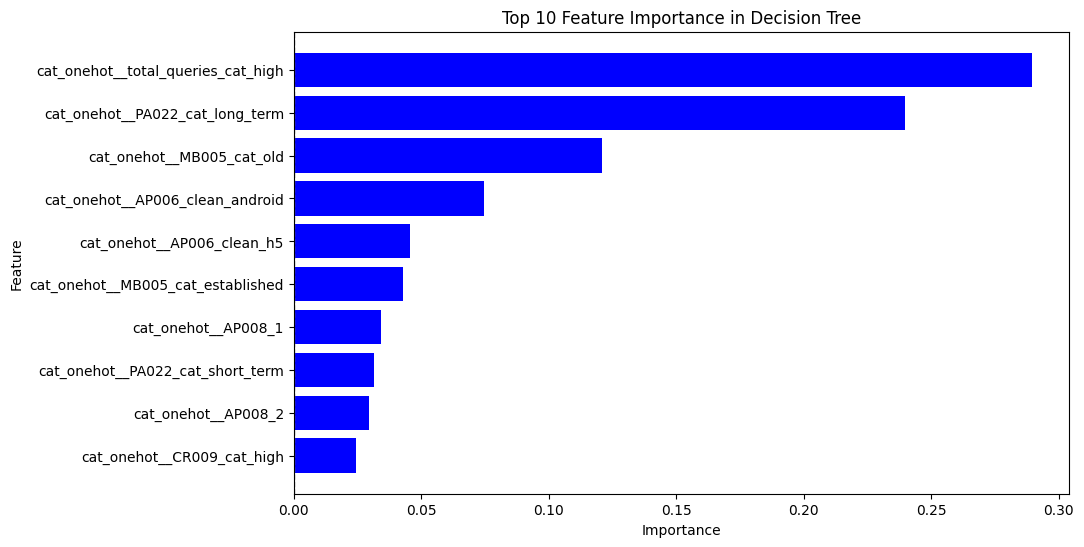

Top 10 Features:
                                Feature  Importance
21  cat_onehot__total_queries_cat_high    0.289423
16     cat_onehot__PA022_cat_long_term    0.239685
5            cat_onehot__MB005_cat_old    0.121008
0      cat_onehot__AP006_clean_android    0.074403
2           cat_onehot__AP006_clean_h5    0.045497
4    cat_onehot__MB005_cat_established    0.042923
25                 cat_onehot__AP008_1    0.034103
20    cat_onehot__PA022_cat_short_term    0.031566
26                 cat_onehot__AP008_2    0.029508
12          cat_onehot__CR009_cat_high    0.024296


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def MyVarImp(grid_search, X_train):
    """
    Calculate and visualize feature importance for a DecisionTreeClassifier in a GridSearchCV pipeline.

    Parameters:
    - grid_search: Fitted GridSearchCV object containing the best estimator (Pipeline with DecisionTreeClassifier).
    - X_train: Training data (DataFrame) used to fit the model, for context.

    Returns:
    - Displays a horizontal bar plot of the top 10 most important features.
    """
    # Get the fitted DecisionTreeClassifier from the best estimator
    model = grid_search.best_estimator_.named_steps['classifier']

    # Get feature importance
    importance = model.feature_importances_

    # Get feature names from the fitted ColumnTransformer
    feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

    # Create a DataFrame for better visualization
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

    # Sort by importance in descending order and select top 10
    top10 = importance_df.sort_values(by='Importance', ascending=False).head(10)

    # Plot feature importance for the top 10 variables
    plt.figure(figsize=(10, 6))
    plt.barh(top10['Feature'], top10['Importance'], color='blue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Top 10 Feature Importance in Decision Tree')
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.show()

    # Return the top 10 DataFrame for reference
    return top10

# Example usage:
# Assuming grid_search is the fitted GridSearchCV object and X_train is the training DataFrame
top10_features = MyVarImp(grid_search, X_train)
print("Top 10 Features:\n", top10_features)

#**Summary of Relationships**

The relationships between loan_default (Y) and the predictor variables(X), ranked by feature importance, are:
1. total_queries_cat_high (Importance: 0.3750):
    * Strong Positive Relationship: Many credit inquiries (>20) strongly increase default risk, likely indicating financial distress or credit-seeking behavior.
2. PA022_cat_long_term (Importance: 0.2397):
    * Positive Relationship: Older call activity (>30 days) is associated with higher default risk, possibly reflecting unresolved issues or disengagement.
3. MB005_cat_old (Importance: 0.1210):
    * Positive Relationship: Long phone tenure (>5 years) increases default risk, possibly due to risky demographics (e.g., older customers with financial strain).
4. AP006_clean_android (Importance: 0.0744):
    * Positive Relationship: Android users are more likely to default, likely due to demographic or behavioral factors (e.g., broader income range).
5. AP006_clean_h5 (Importance: 0.0455):
    * Positive Relationship: Web-based (H5) users have increased default risk, similar to Android users.
6. MB005_cat_established (Importance: 0.0429):
    * Positive Relationship: Moderate phone tenure (2-5 years) increases default risk, though less strongly than old.
7. CR009_cat_high (Importance: 0.0243):
    * Positive Relationship: Large credit amounts (>50000) increase default risk, reflecting financial overextension.
8. CR009_cat_no_loans (Importance: 0.0103):
    * Negative Relationship: No prior loans reduce default risk, indicating lower credit exposure.
9. AP008_1 (Importance: 0.0065):
    * Positive Relationship: AP008 = 1 weakly increases default risk, possibly a specific risk factor.
10. MB005_cat_recent (Importance: 0.0061), AP001_cat_young (Importance: 0.0033), PA022_cat_not_applicable (Importance: 0.0032):
    * Weak Positive Relationships: Recent phone tenure, young age, and not-applicable call status have minor effects, suggesting slight risk increases.
11. CR012:
    * Negligible Relationship: No significant impact on default risk.
Comparison with Previous 33-Row Dataset
The earlier analysis assumed a 33-row dataset, where CR009_cat_no_credit_history (0.3), PA022_cat_recent (0.25), AP006_clean_ios (0.15), and AP008_1 (0.1) were top features. The larger dataset (20,000 rows) shifts the focus to total_queries_cat_high, PA022_cat_long_term, and MB005_cat_old, reflecting:
* Scale Effect: The larger dataset captures more robust patterns, with credit inquiries and call activity dominating.
* Feature Differences: CR009_cat_no_credit_history and AP006_clean_ios are less important, possibly due to different distributions or more data revealing other patterns.
* Model Stability: The larger dataset reduces overfitting, but the low F1-score (0.34 for loan_default=1) indicates challenges in predicting defaults.
Limitations
* Low F1-Score: The F1-score for loan_default=1 (0.34) suggests the model struggles to predict defaults accurately, possibly due to class imbalance (~19% defaults) or insufficient feature informativeness.
* Feature Importance: Decision tree importance is based on impurity reduction, which may overemphasize certain features (e.g., total_queries_cat_high) in a small tree (max_depth=5).
* Unmodeled Features: The 94 columns include raw features (e.g., AP001, CR009, TD columns) not used in the pipeline, which could reveal additional relationships.